# Hello
### This is a QUICK START Notebook.

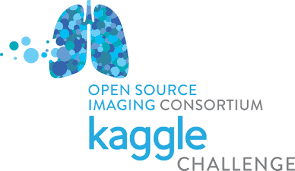
### Working latest hyperparameter tool: *TPOT (ML GENETIC algorithm)*


### Contents

* Data Loading
* Exploratory Aata Analysis with **PRACTICAL REASONING**
* Data pre-processing
* Model traning
* Model testing
* Submit Predictions

### <p style="text-align:center;">Do UPVOTE, if you get a KICK start for your work :-)</p>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
        

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os

from sklearn.preprocessing import StandardScaler
from tpot import TPOTRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
df= pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
df.head()

<hr>


# Exploratory Aata Analysis with PRACTICAL REASONING

In [ ]:
a=df.groupby('Patient').Sex.unique().values
Sex_labels, Sex_counts=np.unique(a, return_counts=True)

b=df.groupby('Patient').SmokingStatus.unique().values
Smoke_labels, Smoke_counts=np.unique(b, return_counts=True)

In [ ]:
#PLOT
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels= Sex_labels, values= Sex_counts, name="SEX"),
              1, 1)
fig.add_trace(go.Pie(labels= Smoke_labels, values= Smoke_counts, name="Status"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Totall unique patient in Traning data:{}".format(len(df.Patient.value_counts())),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sex ratio', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='Smoke counts', x=0.85, y=0.5, font_size=17, showarrow=False)])
fig.show()

In [ ]:
smk_stats= pd.DataFrame(df.groupby(['SmokingStatus','Sex']).Patient.unique())
smk_stats= smk_stats.reset_index()
smk_stats['Patient']= smk_stats.Patient.apply(lambda x:len(x))

#PLOT
fig = px.bar(smk_stats, x='SmokingStatus', y='Patient', color='Sex',
             barmode='group', title='Smoking Status estimation.', height=500)
fig.show()

###  Why **Men** smoke more than **Women** ?
#### There are a few theories.
* Cigarettes are an aggression outlet and men are naturally more aggressive.
* Cigarettes are an adult form of breast-feeding and men take longer, much longer to be weaned.
* Smoking is an exercise in inhaling power and men are naturally more power hungry.

In [ ]:
a=df.groupby('Sex').FVC.unique()
a
# Add histogram data
x1 = a['Male']
x2 = a['Female']

# Group data together
hist_data = [x1, x2]
group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
# Add title
fig.update_layout(title_text='FVC distribution')
fig.update_xaxes(title_text='FVC')
fig.show()

## Ideal value for FVC acc. to respective Sex and Age of patient 
* Normal values in healthy **males** aged 20-60 range from **4500 to 3500 milliliters**.
* Normal values for **females** aged 20-60 range from **3250 to 2500 milliliters**.
* **Above graph reflect those facts**.

In [ ]:
a=df.groupby('SmokingStatus').FVC.unique()
a
# Add histogram data
x1 = a['Currently smokes']
x2 = a['Ex-smoker']
x3= a['Never smoked']

# Group data together
hist_data = [x1, x2, x3]
group_labels = ['Currently smokes', 'Ex-smoker', 'Never smoked']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

# Add title
fig.update_layout(title_text='FCV distribution')
fig.update_xaxes(title_text='FCV')
fig.show()

### Smoking effect on lung capacity
* Smoking hurts your lung capacity. The tar in cigarette smoke coats your lungs and makes the air sacs less elastic. Smoking also produces phlegm that can make your lungs congested. Smoking even a few cigarettes a day can decrease your body’s ability to use oxygen effectivel

In [ ]:
a=df.groupby('Sex').Weeks.unique()
a
# Add histogram data
x1 = a['Male']
x2 = a['Female']

# Group data together
hist_data = [x1, x2]
group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

# Add title
fig.update_layout(title_text='CT scan--->General check-up Week-gap distribution')
fig.update_xaxes(title_text='Week')
fig.show()

* Female are more regular in check-ups then male patient

In [ ]:
f, ax= plt.subplots(1, 2, figsize=(20,6))

a=df.groupby('SmokingStatus').Age.unique()
a
# Add histogram data
x1 = a['Currently smokes']
x2 = a['Ex-smoker']
x3= a['Never smoked']
sns.kdeplot(x1, label='Currently smokes', ax=ax[0]); sns.kdeplot(x2, label='Ex-smoker', ax=ax[0])
sns.kdeplot(x3, label='Never smoked', ax=ax[0])

ax[0].set_xlabel('Age'); ax[1].set_xlabel('Age')
ax[0].set_ylabel('Prob. Distribution'); ax[1].set_ylabel('Prob. Distribution')

a=df.groupby('Sex').Age.unique()
a
# Add histogram data
x1 = a['Male']
x2 = a['Female']
sns.kdeplot(x1, label='Male', ax=ax[1]); sns.kdeplot(x2, label='Female', ax=ax[1])

plt.suptitle("AGE Distribution", size=16)
plt.show()

### Above 2 graphs are Normally Distributed

In [ ]:
f, ax= plt.subplots(1, 2, figsize=(20,6))

sns.scatterplot(df.FVC, df.Percent, hue=df.Sex, ax=ax[0])
sns.scatterplot(df.Weeks, df.FVC, hue=df.Sex, ax=ax[1])

plt.suptitle("Sex Distribution", size=16)
plt.show()

In [ ]:
# View the correlation heat map
corr= df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="YlGnBu",linewidth = 3, linecolor = "white")

### MY another Notebook: *LUNG segmentation [2D+3D] Techniques -OSIC*

## https://www.kaggle.com/akhileshdkapse/lung-segmentation-2d-3d-techniques-osic


![](https://epos.myesr.org/posterimage/esr/ecr2016/132743/media/638205.png)


<hr>



# Data pre-processing

In [ ]:
df.head()

In [ ]:
df=pd.concat([df.drop(['Sex'], axis=1), pd.get_dummies(df['Sex'])], axis=1)
df=pd.concat([df.drop(['SmokingStatus'], axis=1), pd.get_dummies(df['SmokingStatus'])], axis=1)
df.head()

In [ ]:
df.drop(['Female', 'Currently smokes', 'Patient'], inplace=True, axis=1)
df.head()

In [ ]:
df.head()

In [ ]:
df.values.shape

<hr>



# Model traning



#### <p style="text-align:left;">GENETIC algorithm ---> TPOT</p>
**TPOT** is a Python Automated *Machine Learning tool* that optimizes machine learning pipelines using **genetic programming**.

* TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data.

![](https://raw.githubusercontent.com/EpistasisLab/tpot/master/images/tpot-ml-pipeline.png)

* Once TPOT is finished searching (or you get tired of waiting), it provides you with the Python code for the best pipeline it found so you can tinker with the pipeline from there.<br>
* TPOT is built on top of scikit-learn, so all of the code it generates should look familiar... if you're familiar with scikit-learn, anyway.

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(df.drop(['FVC'], axis=1).values, df.FVC.values, test_size=0.12, random_state=45)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

In [ ]:
n_estimators = [11,180,200,210,166,73,89,107]
max_features = ['auto', 'sqrt','log2']
max_depth = [21,22,24,27,30,32,43]
min_samples_split = [2, 5, 9,14,11]
min_samples_leaf = [1, 2, 4,6,8]

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


model = TPOTRegressor(generations= 8, population_size= 30, offspring_size= 16,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestRegressor': param}, 
                                 cv = 4, scoring = 'neg_mean_squared_error')
model.fit(xtrain,ytrain)

In [ ]:
y_pred=model.predict(xtest)

print('---------------------------')
print(mean_squared_error(ytest,y_pred))
print('---------------------------')

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_pred, label='Train')
plt.plot(ytest, label='Predictions')
plt.legend()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(ytrain, label='Train')
plt.plot(model.predict(xtrain), label='Predictions')
plt.legend()

<hr>



# Model testing

In [ ]:
df2= pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')
df2.head()

In [ ]:
df2=pd.concat([df2.drop(['Sex'], axis=1), pd.get_dummies(df2['Sex'])], axis=1)
df2=pd.concat([df2.drop(['SmokingStatus'], axis=1), pd.get_dummies(df2['SmokingStatus'])], axis=1)

id_test= df2.Patient
df2.drop(['Patient'], inplace=True, axis=1)
df2.head()

In [ ]:
# df2.FVC= scaler_Fcv.transform(df2.FVC.values.reshape(-1,1))
# df2.Percent= scaler_Percent.transform(df2.Percent.values.reshape(-1,1))
# df2

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df2.FVC.values, label='test')
plt.plot(model.predict(df2.drop(['FVC'], axis=1).values), label='Prediction')
plt.legend()

<hr>



# Submitting Predictions

In [ ]:
submission = pd.read_csv("/kaggle/input/osic-pulmonary-fibrosis-progression/sample_submission.csv")
submission[['Patient','Weeks']] = submission.Patient_Week.str.split("_",expand=True)
submission.head()

In [ ]:
submission.drop(['FVC', 'Confidence'], axis=1, inplace=True)
df2['Patient'] = id_test

In [ ]:
submission=pd.merge(submission,df2.drop('Weeks', 1),on='Patient',how='left')

In [ ]:
submission.head()

In [ ]:
result = submission.iloc[:, 2:]
result= result.drop('FVC', axis=1)
submission['FVC'] = model.predict(result).astype('int32')

In [ ]:
submission.head()

In [ ]:
submission['tot'] =submission.groupby(['Ex-smoker','Male','Age'])['FVC'].transform('mean')

In [ ]:
submission['Confidence'] = 100*submission['FVC']/submission['tot']
submission['Confidence']= submission['Confidence'].astype('int32')

In [ ]:
submission.head()

In [ ]:
sub_final = submission[['Patient_Week','FVC','Confidence']]
sub_final

In [ ]:
sub_final.to_csv("/kaggle/working/submission.csv",index=False)

![](https://i.pinimg.com/originals/25/7d/3a/257d3afd123f2b88a6832067819596ef.gif)